In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')
df.head(2)

,Weight,Height
0,45,120
1,58,135


Text(0, 0.5, 'Height')

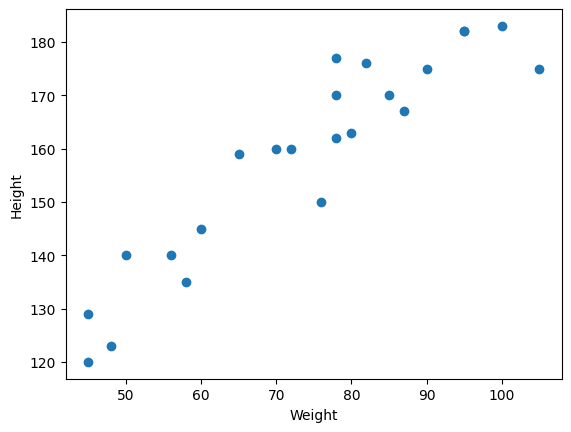

In [3]:
# scatter plot to check relation
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

- When the height increase the weight also increases

In [4]:
# finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


- X and Y has a High correlation

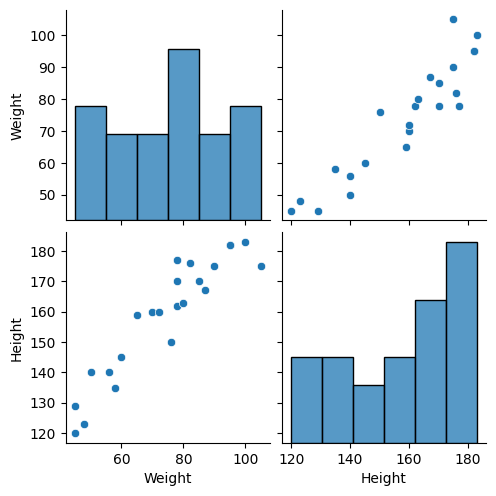

In [5]:
sns.pairplot(df)

- Linear regression works well cause it has a linear relationship between x and y

In [6]:
df.head(2)

,Weight,Height
0,45,120
1,58,135


In [7]:
# Independent to Dependent
X = df[['Weight']] # X should be dataFrame or 2d array.
Y = df['Height'] # y should be in series or !d array

In [8]:
df['Weight'].shape

(23,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [12]:
# Standardization - we have concept called Gradient decent where the values are maybe positive or negative it will take time to reach Global minima so we use Standardization to make it Faster.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

- trasnform - In testing
- Fit_Transform - In training - mean and std get calculated

No Data Leakage allowed - don't want the training data to know any info about testing data

In [15]:
# Apply Simple LR
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

In [16]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [17]:
print('Coefficient or Slope', model.coef_) # slope 
print('Intercept', model.intercept_)

Coefficient or Slope [17.2982057]
Intercept 156.47058823529412


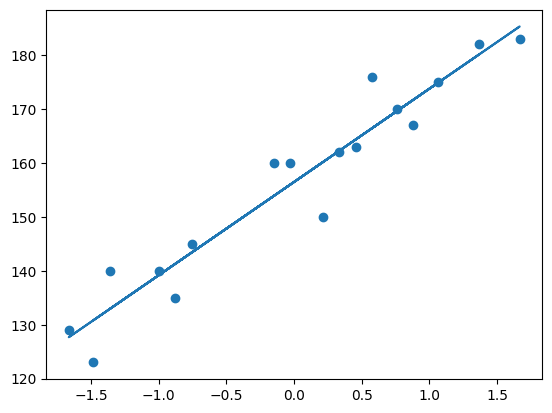

In [18]:
# Plot the training BFL
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train))

### Prediction of the test data
- predicted height output = intercept + coef_(weights)
- y_pred_test = 156.47 + 17.29(X_test)

In [19]:
# prediction for test data
y_pred = model.predict(X_test)

In [20]:
# Performance matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R Square
- Formula
    - R ^ 2 = 1 - SSR / SST
    - R ^ 2 = coefficient of determination SSR = sum of square of residuals SST = total sum of squares

In [22]:
# R2 
from sklearn.metrics import r2_score

In [23]:
score = r2_score(y_test, y_pred)
score

0.7360826717981276

## Adjusted R Square = 1 - [(1 - R2) * (n - 1) / (n - k)]
- where:
  - R2: The R2 of the model n: The number of observation k: The number of predictor variables

In [24]:
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.6701033397476595

In [26]:
# prediction for new data
model.predict(scaler.transform([[72]]))

c:\Users\anoop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

# OLS Technique 

In [27]:
import statsmodels.api as sm

In [28]:
model1 = sm.OLS(y_train, X_train).fit()
model1

In [29]:
prediction = model1.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [30]:
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 20 May 2024   Prob (F-statistic):                       0.664
Time:                        21:37:38   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\anoop\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
